# <span style="color:brown;">Clean Column Names</span>

In [70]:
import polars as pl
from polars import col as c
import re

pl_mkt = pl.read_csv("data/marketing_data.csv")

print(pl_mkt.head())

print(pl_mkt.columns)

shape: (5, 26)
┌──────┬──────┬─────────────┬─────────────┬───┬─────────────┬─────────────┬───────────┬────────────┐
│ week ┆ Year ┆ Market.Shar ┆ Av.Price.pe ┆ … ┆ Reach.cinem ┆ GRP.outdoor ┆ GRP.print ┆ Share.of.s │
│ ---  ┆ ---  ┆ e           ┆ r.kg        ┆   ┆ a           ┆ ---         ┆ ---       ┆ pend       │
│ i64  ┆ i64  ┆ ---         ┆ ---         ┆   ┆ ---         ┆ i64         ┆ f64       ┆ ---        │
│      ┆      ┆ f64         ┆ f64         ┆   ┆ f64         ┆             ┆           ┆ f64        │
╞══════╪══════╪═════════════╪═════════════╪═══╪═════════════╪═════════════╪═══════════╪════════════╡
│ 19   ┆ 2010 ┆ 38.4        ┆ 7.61        ┆ … ┆ null        ┆ null        ┆ null      ┆ null       │
│ 20   ┆ 2010 ┆ 36.8        ┆ 7.6         ┆ … ┆ null        ┆ null        ┆ null      ┆ null       │
│ 21   ┆ 2010 ┆ 35.21       ┆ 7.63        ┆ … ┆ null        ┆ null        ┆ null      ┆ null       │
│ 22   ┆ 2010 ┆ 35.03       ┆ 7.22        ┆ … ┆ null        ┆ null        ┆ 

In [71]:
pl_mkt = (
    pl_mkt
    .rename(lambda col: re.sub('\\.|\\s+', '_', col.lower()))
)

print(pl_mkt)

print(pl_mkt.columns)

shape: (156, 26)
┌──────┬──────┬─────────────┬─────────────┬───┬─────────────┬─────────────┬───────────┬────────────┐
│ week ┆ year ┆ market_shar ┆ av_price_pe ┆ … ┆ reach_cinem ┆ grp_outdoor ┆ grp_print ┆ share_of_s │
│ ---  ┆ ---  ┆ e           ┆ r_kg        ┆   ┆ a           ┆ ---         ┆ ---       ┆ pend       │
│ i64  ┆ i64  ┆ ---         ┆ ---         ┆   ┆ ---         ┆ i64         ┆ f64       ┆ ---        │
│      ┆      ┆ f64         ┆ f64         ┆   ┆ f64         ┆             ┆           ┆ f64        │
╞══════╪══════╪═════════════╪═════════════╪═══╪═════════════╪═════════════╪═══════════╪════════════╡
│ 19   ┆ 2010 ┆ 38.4        ┆ 7.61        ┆ … ┆ null        ┆ null        ┆ null      ┆ null       │
│ 20   ┆ 2010 ┆ 36.8        ┆ 7.6         ┆ … ┆ null        ┆ null        ┆ null      ┆ null       │
│ 21   ┆ 2010 ┆ 35.21       ┆ 7.63        ┆ … ┆ null        ┆ null        ┆ null      ┆ null       │
│ 22   ┆ 2010 ┆ 35.03       ┆ 7.22        ┆ … ┆ null        ┆ null        

# <span style="color:brown;">Handle NA Values</span>

In [72]:
print(
    pl_mkt
    .null_count()
    .transpose(
        include_header=True,
        header_name="column",
        column_names=["null_count"]
    )
)

shape: (26, 2)
┌────────────────────────┬────────────┐
│ column                 ┆ null_count │
│ ---                    ┆ ---        │
│ str                    ┆ u32        │
╞════════════════════════╪════════════╡
│ week                   ┆ 0          │
│ year                   ┆ 0          │
│ market_share           ┆ 0          │
│ av_price_per_kg        ┆ 0          │
│ non-promo_price_per_kg ┆ 0          │
│ …                      ┆ …          │
│ reach_tv               ┆ 104        │
│ reach_cinema           ┆ 138        │
│ grp_outdoor            ┆ 155        │
│ grp_print              ┆ 134        │
│ share_of_spend         ┆ 40         │
└────────────────────────┴────────────┘


In [86]:
# Drop columns where the NA values are more than 1/3 of the total observations

cols_to_drop = (
    pl_mkt
    .null_count()
    .transpose(
        include_header=True,
        header_name="column",
        column_names=["null_count"]
    )
    .filter(c('null_count') > (1/3 * pl_mkt.shape[0]))
    .get_column('column')
)

print(cols_to_drop)

shape: (7,)
Series: 'column' [str]
[
	"grp_radio"
	"reach_radio"
	"grp_tv"
	"reach_tv"
	"reach_cinema"
	"grp_outdoor"
	"grp_print"
]


In [89]:
pl_mkt_dropped = pl_mkt.drop(*cols_to_drop)

print(pl_mkt_dropped)

shape: (156, 19)
┌──────┬──────┬──────────────┬───────────────┬───┬───────┬─────────────┬────────────┬──────────────┐
│ week ┆ year ┆ market_share ┆ av_price_per_ ┆ … ┆ aided ┆ penetration ┆ competitor ┆ share_of_spe │
│ ---  ┆ ---  ┆ ---          ┆ kg            ┆   ┆ ---   ┆ ---         ┆ ---        ┆ nd           │
│ i64  ┆ i64  ┆ f64          ┆ ---           ┆   ┆ f64   ┆ f64         ┆ f64        ┆ ---          │
│      ┆      ┆              ┆ f64           ┆   ┆       ┆             ┆            ┆ f64          │
╞══════╪══════╪══════════════╪═══════════════╪═══╪═══════╪═════════════╪════════════╪══════════════╡
│ 19   ┆ 2010 ┆ 38.4         ┆ 7.61          ┆ … ┆ null  ┆ null        ┆ null       ┆ null         │
│ 20   ┆ 2010 ┆ 36.8         ┆ 7.6           ┆ … ┆ null  ┆ null        ┆ null       ┆ null         │
│ 21   ┆ 2010 ┆ 35.21        ┆ 7.63          ┆ … ┆ null  ┆ null        ┆ null       ┆ null         │
│ 22   ┆ 2010 ┆ 35.03        ┆ 7.22          ┆ … ┆ null  ┆ null        ┆ n

In [90]:
# Fill NA values with "mean" strategy

print(pl_mkt_dropped.fill_null(strategy = 'mean'))

shape: (156, 19)
┌──────┬──────┬─────────────┬─────────────┬───┬───────────┬─────────────┬────────────┬─────────────┐
│ week ┆ year ┆ market_shar ┆ av_price_pe ┆ … ┆ aided     ┆ penetration ┆ competitor ┆ share_of_sp │
│ ---  ┆ ---  ┆ e           ┆ r_kg        ┆   ┆ ---       ┆ ---         ┆ ---        ┆ end         │
│ i64  ┆ i64  ┆ ---         ┆ ---         ┆   ┆ f64       ┆ f64         ┆ f64        ┆ ---         │
│      ┆      ┆ f64         ┆ f64         ┆   ┆           ┆             ┆            ┆ f64         │
╞══════╪══════╪═════════════╪═════════════╪═══╪═══════════╪═════════════╪════════════╪═════════════╡
│ 19   ┆ 2010 ┆ 38.4        ┆ 7.61        ┆ … ┆ 98.201626 ┆ 64.346341   ┆ 2.924324   ┆ 45.314027   │
│ 20   ┆ 2010 ┆ 36.8        ┆ 7.6         ┆ … ┆ 98.201626 ┆ 64.346341   ┆ 2.924324   ┆ 45.314027   │
│ 21   ┆ 2010 ┆ 35.21       ┆ 7.63        ┆ … ┆ 98.201626 ┆ 64.346341   ┆ 2.924324   ┆ 45.314027   │
│ 22   ┆ 2010 ┆ 35.03       ┆ 7.22        ┆ … ┆ 98.201626 ┆ 64.346341   ┆ 

In [94]:
# Fill NA values using machine learning KNNImputer from sklearn

from sklearn.impute import KNNImputer

pl_mkt_filled = pl.DataFrame(
    data = KNNImputer(n_neighbors = 10).fit_transform(pl_mkt_dropped.to_numpy()),
    schema = pl_mkt_dropped.columns
)

print(pl_mkt_filled)

shape: (156, 19)
┌──────┬────────┬──────────────┬──────────────┬───┬───────┬─────────────┬────────────┬─────────────┐
│ week ┆ year   ┆ market_share ┆ av_price_per ┆ … ┆ aided ┆ penetration ┆ competitor ┆ share_of_sp │
│ ---  ┆ ---    ┆ ---          ┆ _kg          ┆   ┆ ---   ┆ ---         ┆ ---        ┆ end         │
│ f64  ┆ f64    ┆ f64          ┆ ---          ┆   ┆ f64   ┆ f64         ┆ f64        ┆ ---         │
│      ┆        ┆              ┆ f64          ┆   ┆       ┆             ┆            ┆ f64         │
╞══════╪════════╪══════════════╪══════════════╪═══╪═══════╪═════════════╪════════════╪═════════════╡
│ 19.0 ┆ 2010.0 ┆ 38.4         ┆ 7.61         ┆ … ┆ 98.3  ┆ 0.0         ┆ 0.63       ┆ 60.680307   │
│ 20.0 ┆ 2010.0 ┆ 36.8         ┆ 7.6          ┆ … ┆ 98.3  ┆ 0.0         ┆ 0.63       ┆ 60.680307   │
│ 21.0 ┆ 2010.0 ┆ 35.21        ┆ 7.63         ┆ … ┆ 98.3  ┆ 0.0         ┆ 0.63       ┆ 60.680307   │
│ 22.0 ┆ 2010.0 ┆ 35.03        ┆ 7.22         ┆ … ┆ 98.3  ┆ 0.0         ┆ 

In [97]:
# Fill NA values using machine learning IterativeImputer from sklearn

from sklearn.experimental import enable_iterative_imputer  # This enables the experimental feature
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

pl_mkt_filled = pl.DataFrame(
    data = IterativeImputer(max_iter=10, random_state=0, estimator=RandomForestRegressor()).fit_transform(pl_mkt_dropped.to_numpy()),
    schema = pl_mkt_dropped.columns
)

print(pl_mkt_filled)

shape: (156, 19)
┌──────┬────────┬──────────────┬─────────────┬───┬────────┬─────────────┬────────────┬─────────────┐
│ week ┆ year   ┆ market_share ┆ av_price_pe ┆ … ┆ aided  ┆ penetration ┆ competitor ┆ share_of_sp │
│ ---  ┆ ---    ┆ ---          ┆ r_kg        ┆   ┆ ---    ┆ ---         ┆ ---        ┆ end         │
│ f64  ┆ f64    ┆ f64          ┆ ---         ┆   ┆ f64    ┆ f64         ┆ f64        ┆ ---         │
│      ┆        ┆              ┆ f64         ┆   ┆        ┆             ┆            ┆ f64         │
╞══════╪════════╪══════════════╪═════════════╪═══╪════════╪═════════════╪════════════╪═════════════╡
│ 19.0 ┆ 2010.0 ┆ 38.4         ┆ 7.61        ┆ … ┆ 98.055 ┆ 0.0         ┆ 0.701      ┆ 62.992447   │
│ 20.0 ┆ 2010.0 ┆ 36.8         ┆ 7.6         ┆ … ┆ 98.121 ┆ 0.0         ┆ 0.722      ┆ 70.518443   │
│ 21.0 ┆ 2010.0 ┆ 35.21        ┆ 7.63        ┆ … ┆ 98.099 ┆ 0.0         ┆ 0.727      ┆ 45.115148   │
│ 22.0 ┆ 2010.0 ┆ 35.03        ┆ 7.22        ┆ … ┆ 98.081 ┆ 0.0         ┆ 

# <span style="color:brown;">Binning - Discretization</span>

In [99]:
pl_mkt_filled.get_column('market_share')

market_share
f64
38.4
36.8
35.21
35.03
32.37
…
33.26
33.99
30.57


In [116]:
(
    pl_mkt_filled
    .select('market_share')
    .with_columns(
        mks_level = c('market_share').qcut(
            quantiles = [0.25, 0.75], 
            labels = ['low', 'medium', 'high']
        )
    )
)

market_share,mks_level
f64,cat
38.4,"""high"""
36.8,"""high"""
35.21,"""high"""
35.03,"""medium"""
32.37,"""medium"""
…,…
33.26,"""medium"""
33.99,"""medium"""
30.57,"""low"""


In [117]:
(
    pl_mkt_filled
    .select('market_share')
    .with_columns(
        mks_level = c('market_share').qcut(
            quantiles = [0.25, 0.75], 
            labels = ['low', 'medium', 'high']
        )
    )
    .get_column('mks_level')
    .value_counts()
)

mks_level,count
cat,u32
"""low""",39
"""medium""",78
"""high""",39


# <span style="color:brown;">Caterical Encoding</span>

In [149]:
pl_ckd = (
    pl.read_csv('data/ChronicKidneyDisease.csv', columns = ['id', 'age', 'bp', 'sg', 'pc', 'classification'])
    .with_columns(classification = c('classification').str.strip_chars())
    .drop_nulls()
)

print(pl_ckd)

shape: (320, 6)
┌─────┬──────┬──────┬───────┬──────────┬────────────────┐
│ id  ┆ age  ┆ bp   ┆ sg    ┆ pc       ┆ classification │
│ --- ┆ ---  ┆ ---  ┆ ---   ┆ ---      ┆ ---            │
│ i64 ┆ f64  ┆ f64  ┆ f64   ┆ str      ┆ str            │
╞═════╪══════╪══════╪═══════╪══════════╪════════════════╡
│ 0   ┆ 48.0 ┆ 80.0 ┆ 1.02  ┆ normal   ┆ ckd            │
│ 1   ┆ 7.0  ┆ 50.0 ┆ 1.02  ┆ normal   ┆ ckd            │
│ 2   ┆ 62.0 ┆ 80.0 ┆ 1.01  ┆ normal   ┆ ckd            │
│ 3   ┆ 48.0 ┆ 70.0 ┆ 1.005 ┆ abnormal ┆ ckd            │
│ 4   ┆ 51.0 ┆ 80.0 ┆ 1.01  ┆ normal   ┆ ckd            │
│ …   ┆ …    ┆ …    ┆ …     ┆ …        ┆ …              │
│ 395 ┆ 55.0 ┆ 80.0 ┆ 1.02  ┆ normal   ┆ notckd         │
│ 396 ┆ 42.0 ┆ 70.0 ┆ 1.025 ┆ normal   ┆ notckd         │
│ 397 ┆ 12.0 ┆ 80.0 ┆ 1.02  ┆ normal   ┆ notckd         │
│ 398 ┆ 17.0 ┆ 60.0 ┆ 1.025 ┆ normal   ┆ notckd         │
│ 399 ┆ 58.0 ┆ 80.0 ┆ 1.025 ┆ normal   ┆ notckd         │
└─────┴──────┴──────┴───────┴──────────┴────────────────

In [151]:
# One-hot encoder

print(pl_ckd.to_dummies(columns = 'classification'))

print(pl_ckd.to_dummies(columns = 'classification', drop_first=True))

shape: (320, 7)
┌─────┬──────┬──────┬───────┬──────────┬────────────────────┬───────────────────────┐
│ id  ┆ age  ┆ bp   ┆ sg    ┆ pc       ┆ classification_ckd ┆ classification_notckd │
│ --- ┆ ---  ┆ ---  ┆ ---   ┆ ---      ┆ ---                ┆ ---                   │
│ i64 ┆ f64  ┆ f64  ┆ f64   ┆ str      ┆ u8                 ┆ u8                    │
╞═════╪══════╪══════╪═══════╪══════════╪════════════════════╪═══════════════════════╡
│ 0   ┆ 48.0 ┆ 80.0 ┆ 1.02  ┆ normal   ┆ 1                  ┆ 0                     │
│ 1   ┆ 7.0  ┆ 50.0 ┆ 1.02  ┆ normal   ┆ 1                  ┆ 0                     │
│ 2   ┆ 62.0 ┆ 80.0 ┆ 1.01  ┆ normal   ┆ 1                  ┆ 0                     │
│ 3   ┆ 48.0 ┆ 70.0 ┆ 1.005 ┆ abnormal ┆ 1                  ┆ 0                     │
│ 4   ┆ 51.0 ┆ 80.0 ┆ 1.01  ┆ normal   ┆ 1                  ┆ 0                     │
│ …   ┆ …    ┆ …    ┆ …     ┆ …        ┆ …                  ┆ …                     │
│ 395 ┆ 55.0 ┆ 80.0 ┆ 1.02  ┆ normal  

In [152]:
pl_baseball = pl.read_csv('data/baseball.csv', columns = ['Name', 'Position'])

print(pl_baseball)

# Label encoder
print(
    pl_baseball
    .with_columns(Position_encd = c('Position').cast(pl.Categorical).to_physical())
)

# One-hot encoder
print(pl_baseball.to_dummies(columns = 'Position', drop_first = True))

shape: (1_015, 2)
┌─────────────────┬────────────────┐
│ Name            ┆ Position       │
│ ---             ┆ ---            │
│ str             ┆ str            │
╞═════════════════╪════════════════╡
│ Adam_Donachie   ┆ Catcher        │
│ Paul_Bako       ┆ Catcher        │
│ Ramon_Hernandez ┆ Catcher        │
│ Kevin_Millar    ┆ First_Baseman  │
│ Chris_Gomez     ┆ First_Baseman  │
│ …               ┆ …              │
│ Brad_Thompson   ┆ Relief_Pitcher │
│ Tyler_Johnson   ┆ Relief_Pitcher │
│ Chris_Narveson  ┆ Relief_Pitcher │
│ Randy_Keisler   ┆ Relief_Pitcher │
│ Josh_Kinney     ┆ Relief_Pitcher │
└─────────────────┴────────────────┘
shape: (1_015, 3)
┌─────────────────┬────────────────┬───────────────┐
│ Name            ┆ Position       ┆ Position_encd │
│ ---             ┆ ---            ┆ ---           │
│ str             ┆ str            ┆ u32           │
╞═════════════════╪════════════════╪═══════════════╡
│ Adam_Donachie   ┆ Catcher        ┆ 0             │
│ Paul_Bako      

# <span style="color:brown;">Feature Selection</span>

In [153]:
pl_PhonePrice = pl.read_csv('data/MobilePhone_Pricing.csv')

print(pl_PhonePrice)

shape: (2_000, 21)
┌───────────────┬──────┬─────────────┬──────────┬───┬─────────┬──────────────┬──────┬─────────────┐
│ battery_power ┆ blue ┆ clock_speed ┆ dual_sim ┆ … ┆ three_g ┆ touch_screen ┆ wifi ┆ price_range │
│ ---           ┆ ---  ┆ ---         ┆ ---      ┆   ┆ ---     ┆ ---          ┆ ---  ┆ ---         │
│ i64           ┆ i64  ┆ f64         ┆ i64      ┆   ┆ i64     ┆ i64          ┆ i64  ┆ i64         │
╞═══════════════╪══════╪═════════════╪══════════╪═══╪═════════╪══════════════╪══════╪═════════════╡
│ 842           ┆ 0    ┆ 2.2         ┆ 0        ┆ … ┆ 0       ┆ 0            ┆ 1    ┆ 1           │
│ 1021          ┆ 1    ┆ 0.5         ┆ 1        ┆ … ┆ 1       ┆ 1            ┆ 0    ┆ 2           │
│ 563           ┆ 1    ┆ 0.5         ┆ 1        ┆ … ┆ 1       ┆ 1            ┆ 0    ┆ 2           │
│ 615           ┆ 1    ┆ 2.5         ┆ 0        ┆ … ┆ 1       ┆ 0            ┆ 0    ┆ 2           │
│ 1821          ┆ 1    ┆ 1.2         ┆ 0        ┆ … ┆ 1       ┆ 1            ┆ 0 

In [160]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

k_best = SelectKBest(score_func=mutual_info_classif, k='all').fit(
    X = pl_PhonePrice.drop('price_range'), 
    y = pl_PhonePrice['price_range']
)

pl_k_best_scores = (
    pl.DataFrame({
        'Feature_Name': pl_PhonePrice.drop('price_range').columns,
        'Score': k_best.scores_
    })
    .sort(by = 'Score', descending = True)
    .with_columns(
        Cumulative_Percentage = c('Score').cum_sum() / c('Score').sum()
    )
)

print(pl_k_best_scores)

shape: (20, 3)
┌───────────────┬──────────┬───────────────────────┐
│ Feature_Name  ┆ Score    ┆ Cumulative_Percentage │
│ ---           ┆ ---      ┆ ---                   │
│ str           ┆ f64      ┆ f64                   │
╞═══════════════╪══════════╪═══════════════════════╡
│ ram           ┆ 0.847073 ┆ 0.85574               │
│ px_width      ┆ 0.035355 ┆ 0.891457              │
│ battery_power ┆ 0.028142 ┆ 0.919886              │
│ px_height     ┆ 0.023746 ┆ 0.943875              │
│ pc            ┆ 0.02197  ┆ 0.966069              │
│ …             ┆ …        ┆ …                     │
│ m_dep         ┆ 0.0      ┆ 1.0                   │
│ mobile_wt     ┆ 0.0      ┆ 1.0                   │
│ n_cores       ┆ 0.0      ┆ 1.0                   │
│ three_g       ┆ 0.0      ┆ 1.0                   │
│ wifi          ┆ 0.0      ┆ 1.0                   │
└───────────────┴──────────┴───────────────────────┘


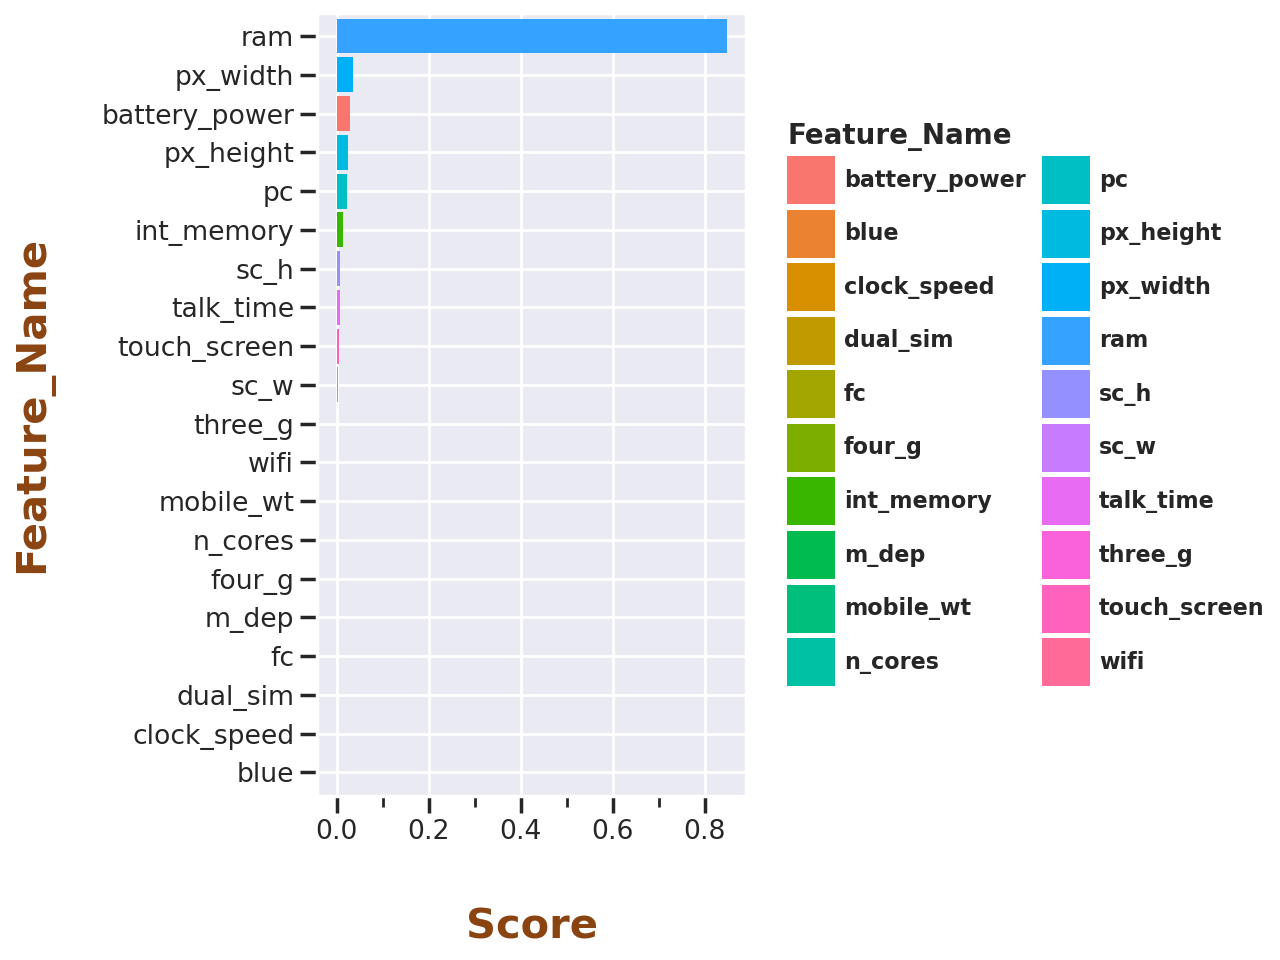

In [164]:
import plotnine as pln

(
    pln.ggplot(data = pl_k_best_scores)
    + pln.theme_seaborn(style='darkgrid')
    + pln.geom_bar(mapping = pln.aes(x = 'reorder(Feature_Name, Score)', y = 'Score', fill = 'Feature_Name'), stat = 'identity')
    + pln.xlab('Feature_Name')
    + pln.coord_flip()
    + pln.theme(
        axis_title_x = pln.element_text(color = "#8a4412", size = 15, weight = "bold", margin = {'t':15}),
        axis_title_y = pln.element_text(color = "#8a4412", size = 15, weight = "bold", margin = {'r':15}),
        legend_title = pln.element_text(size = 10, weight = "bold"),
        legend_text = pln.element_text(size = 8, weight = "bold")
    )
)